In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from collections import Counter
from sklearn.preprocessing import StandardScaler

"""
This is a notebook, which contains my experiments with the red-wine-quality dataset. 
The file will include the dataset exploration, classification and whatever I come up with.
"""

wine = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
#showcasing the head of the dataset
wine.drop_duplicates(inplace = True)
wine.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [2]:
minimum = wine['quality'].min()
minimum

3

In [3]:
maximum = wine['quality'].max()
maximum

8

The maximum value, associated with a wine's quality is *8*, while the minimum one is *3*. Next, I will examine the relationships of other variables with the *quality* predictor.

In [4]:
wine.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset should not require too much cleaning, since it has already been preprocessed and made convenient to use. 

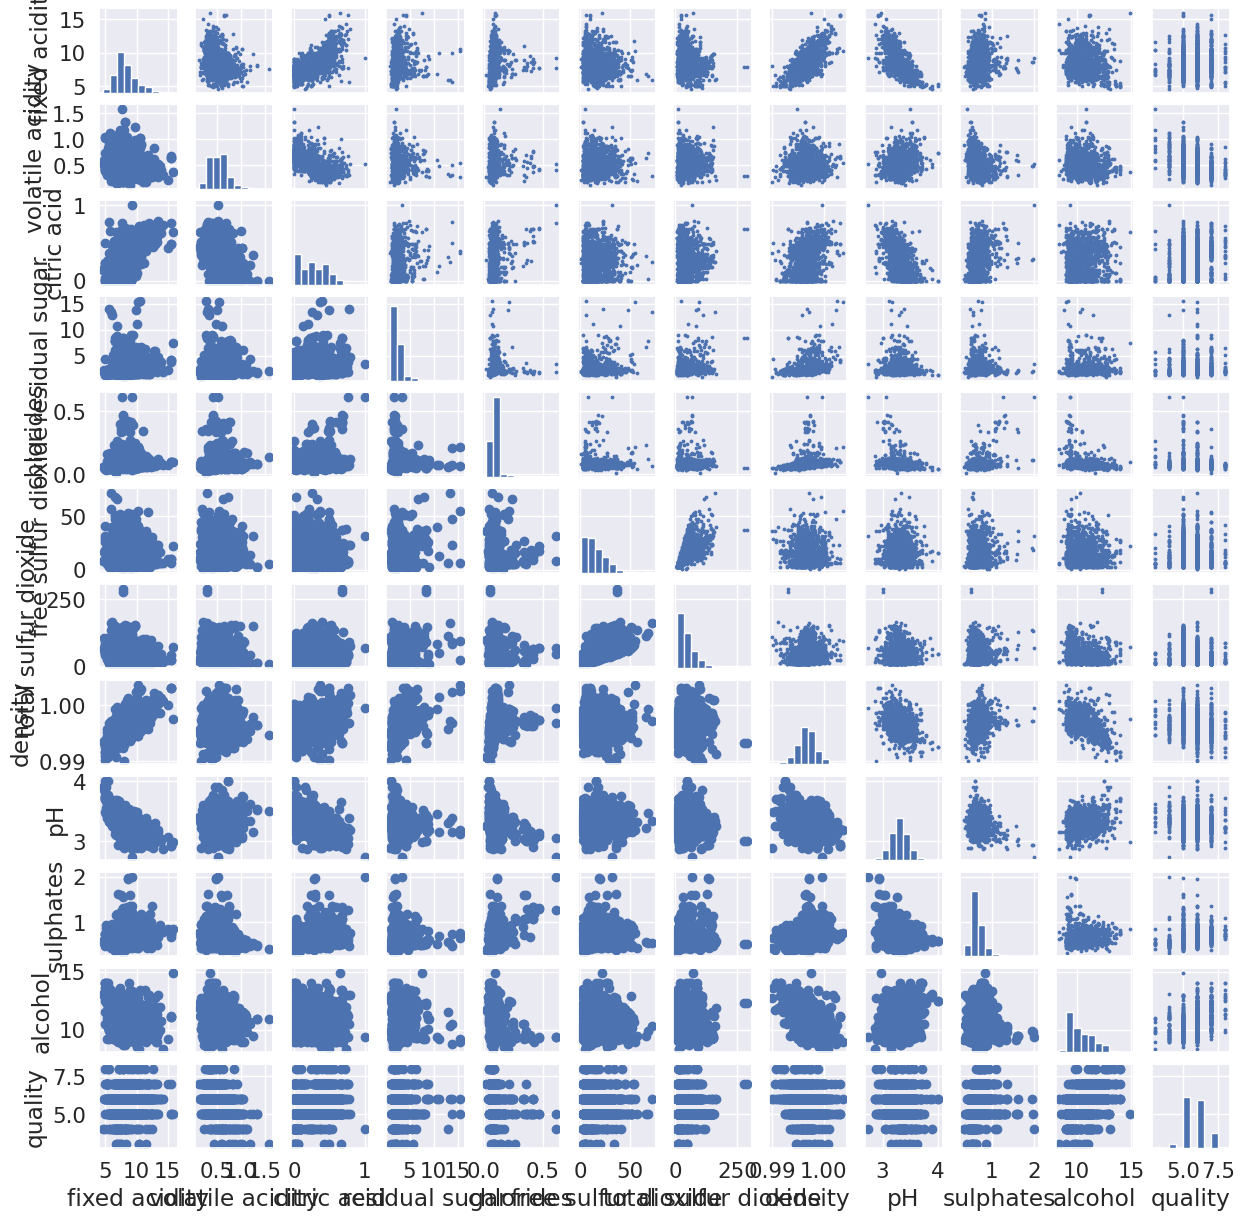

In [5]:
g = sns.PairGrid(wine)
sns.set_style("whitegrid")
g.map_upper(plt.scatter, s=3) #defines the upper triangle of the grid to be scatter plots
g.map_diag(plt.hist) #defines the diagonal of the grid to be histograms
g.map_lower(plt.scatter) #defines the lower triangle of the grid to be scatter plots, like the upper one 
g.fig.set_size_inches(12, 12)

Visually, it seems like *alcohol*, *citric acid* and *sulphates* have a positive correlation with the *quality* variable. To check my findings, I display the correlation matrix of *wine* further.

In [6]:
wine.corr(method='spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.280162,0.657387,0.222396,0.244095,-0.157857,-0.083827,0.626628,-0.708560,0.220696,-0.062696,0.111693
volatile acidity,-0.280162,1.000000,-0.610925,0.031299,0.170678,0.012162,0.092548,0.032264,0.245973,-0.324207,-0.225714,-0.387450
citric acid,0.657387,-0.610925,1.000000,0.170096,0.110679,-0.059585,0.021124,0.344303,-0.558594,0.341512,0.090798,0.219427
residual sugar,0.222396,0.031299,0.170096,1.000000,0.215528,0.077652,0.141515,0.414489,-0.091543,0.029702,0.112205,0.025749
chlorides,0.244095,0.170678,0.110679,0.215528,1.000000,0.010096,0.141324,0.420550,-0.234452,0.033630,-0.301525,-0.204360
free sulfur dioxide,-0.157857,0.012162,-0.059585,0.077652,0.010096,1.000000,0.789881,-0.025635,0.090857,0.041320,-0.099386,-0.058746
total sulfur dioxide,-0.083827,0.092548,0.021124,0.141515,0.141324,0.789881,1.000000,0.137455,-0.029526,-0.008333,-0.275353,-0.196620
density,0.626628,0.032264,0.344303,0.414489,0.420550,-0.025635,0.137455,1.000000,-0.322763,0.157787,-0.470019,-0.184302
pH,-0.708560,0.245973,-0.558594,-0.091543,-0.234452,0.090857,-0.029526,-0.322763,1.000000,-0.100048,0.183005,-0.042738
sulphates,0.220696,-0.324207,0.341512,0.029702,0.033630,0.041320,-0.008333,0.157787,-0.100048,1.000000,0.207636,0.380581


The matrix shows, that there is a considerable positive correlation between *alcohol*, *sulphates* and *quality*. There is also a notable negative correlation between *quality* and *volatile acidity*.

For the purpose of increasing model performance, I first only consider the features that have a correlation coefficient with *quality* > 0.1.

In [7]:
#splitting select df columns into training and test data
cols = ['fixed acidity', 'citric acid', 'sulphates', 'alcohol']
X = wine[cols].to_numpy()
y = wine['quality'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#scaling the input features, so that the ranges of each predictor are similar.
#not scaling the variables will result in poorer model performance and bias towards
#features with a greater magnitude, which we do not want in a distance-based algorithm
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#the KNN classifier setup, using euclidian distance as the distance metric
def eudist(p1, p2):
    dist = np.sqrt(np.sum(p1 - p2) ** 2)
    return dist

In [9]:
#manhattan distance
def manhattan(p1,p2):
    dist = 0
    for i in range(len(p1)):
        dist += abs(p1[i]-p2[i])
        
    return dist

In [10]:
class KNN():
    """
    The k-Nearest-Neighbours class.  
    """
    def __init__(self, k=3, p=1, metric='euclidian'): #p is a placeholder for the minkowski distance implementation
        self.k = k
        self.metric = metric
        self.p = p
        self.predictions = []
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X, metric='euclidian'):
        predictions = [self._predict(x, metric) for x in X]
        
        self.predictions = predictions
        return predictions 
        
    def _predict(self, x, metric='euclidian'):
        if metric == 'euclidian':
            distances = [eudist(x, row) for row in self.X_train]
            
        elif metric == 'manhattan':
            distances = [manhattan(x, row) for row in self.X_train]
 
        knearest = np.argsort(distances)[:self.k]
        knearest_labels = [self.y_train[idx] for idx in knearest]
        pred = Counter(knearest_labels).most_common(1)[0][0]
        return pred
    
    def accuracy(self):
        correct_predictions = np.sum(self.predictions == y_test)
        total_predictions = len(y_test)
        accuracy = (correct_predictions / total_predictions) * 100
        return accuracy

In [11]:
#demonstrating the KNN class in action
classifier = KNN(k=175)
classifier.fit(X_train, y_train)
classifier.predict(X_test)
print(f'the accuracy of a euclidian-based KNN classifier, k={classifier.k}: {classifier.accuracy()}')

the accuracy of a euclidian-based KNN classifier, k=175: 51.10294117647059


In [12]:
classifier.predict(X_test, metric='manhattan')
print(f'the accuracy of a manhattan-based KNN classifier, k={classifier.k}: {classifier.accuracy()}')

the accuracy of a manhattan-based KNN classifier, k=175: 59.92647058823529


As can be seen, the Manhattan distance tackles the classification problem significantly better than the Euclidian one, which proves the former as the better option for problems of higher dimensions. Measures will be taken to further optimize the model, however, such as hyperparameter tuning, experimenting with other distance metrics etc. 